In [ ]:
"""
准备一个hub但多个版本

交叉熵函数会有一个很好的放大效应

牢固的，拆解开了的基础


没有框架 麻烦而已    可能试错而损失  这是不愿意去做的原因


先写成错的


根据结果反应去找鞍点


"""

# TensorFlow Session 

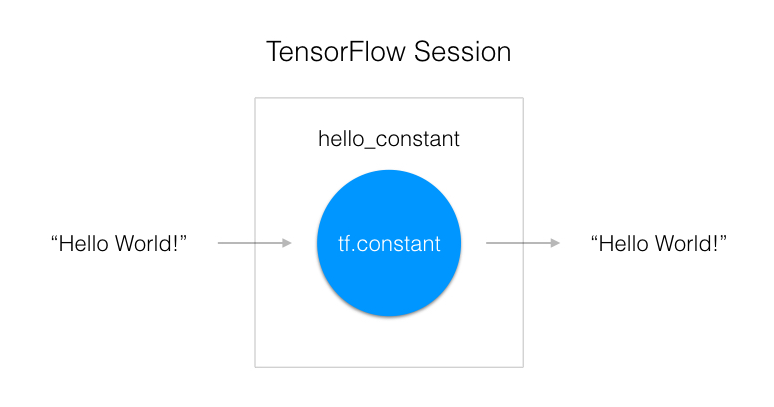

如上图所示，一个 "TensorFlow Session" 是用来运行图的环境。这个 session 负责分配 GPU(s) 和／或 CPU(s)，包括远程计算机的运算。

# TensorFlow Session

## 最核心的biaoda

### 归一化到1
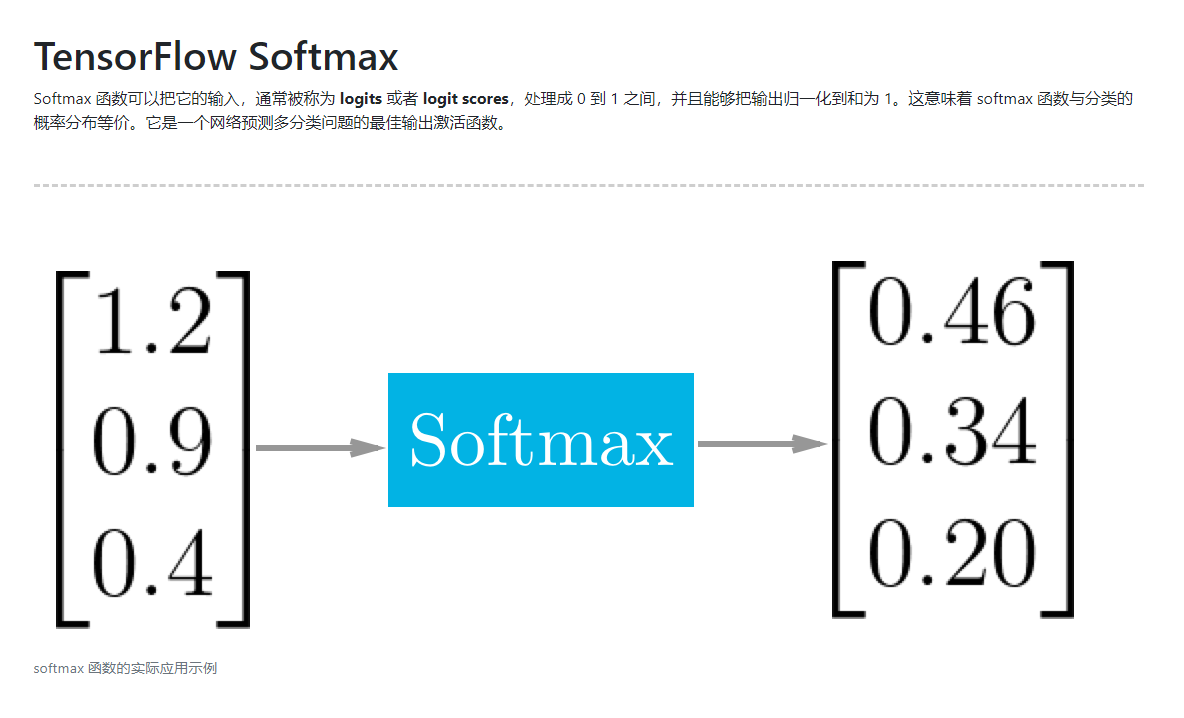

## Cross Entropy

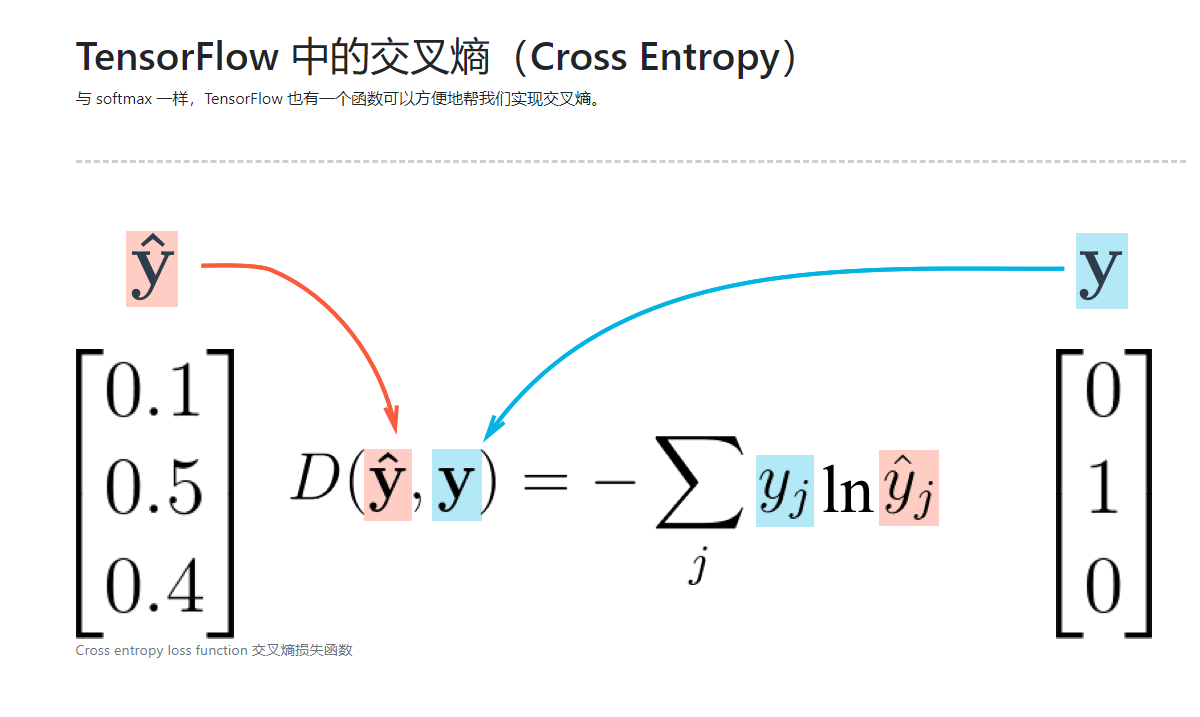

In [1]:
0.95**60

0.046069798986951946

In [2]:
0.9**60

0.001797010299914434

In [3]:
0.99**60

0.5471566423907612

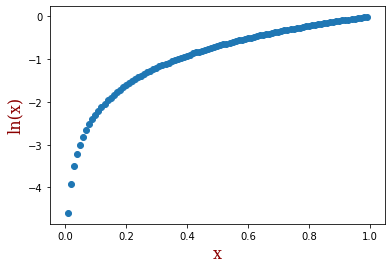

In [15]:
import matplotlib.pyplot as plt
import numpy as np

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


X = np.arange(0.01,1,0.01)
Y = np.log(X)
plt.title('')
plt.xlabel('x', fontdict=font)
plt.ylabel('ln(x)',fontdict=font)
plt.scatter(X,Y)

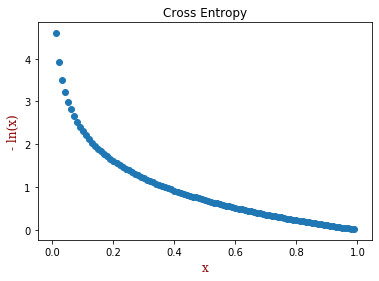

In [18]:
import matplotlib.pyplot as plt
import numpy as np

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }


X = np.arange(0.01,1,0.01)
Y = -np.log(X)
plt.title('Cross Entropy')
plt.xlabel('x', fontdict=font)
plt.ylabel('- ln(x)',fontdict=font)
plt.scatter(X,Y)

In [5]:
# Cross Entropy   d对结果进行放大
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

# TODO: Print cross entropy from session
cross_entropy = -tf.reduce_sum(tf.multiply(one_hot_data, tf.log(softmax_data)))



with tf.Session() as session:
    z = session.run(cross_entropy)

print(z)

# Mini-batching

在这一节，你将了解什么是 mini-batching，以及如何在 TensorFlow 里应用它。

Mini-batching 是一个一次训练数据集的一小部分，而不是整个训练集的技术。它可以使内存较小、不能同时训练整个数据集的电脑也可以训练模型。

Mini-batching 从运算角度来说是低效的，因为你不能在所有样本中计算 loss。但是这点小代价也比根本不能运行模型要划算。

它跟随机梯度下降（SGD）结合在一起用也很有帮助。方法是在每一代训练之前，对数据进行随机混洗，然后创建 mini-batches，对每一个 mini-batch，用梯度下降训练网络权重。因为这些 batches 是随机的，你其实是在对每个 batch 做随机梯度下降（SGD）。

让我们看看你的机器能否训练出 MNIST 数据集的权重和偏置项。

In [19]:
55000 * 784 * 32

1379840000

In [20]:
55000 * 10 * 32

17600000

In [21]:
784*10*32

250880

In [22]:
10*32

320

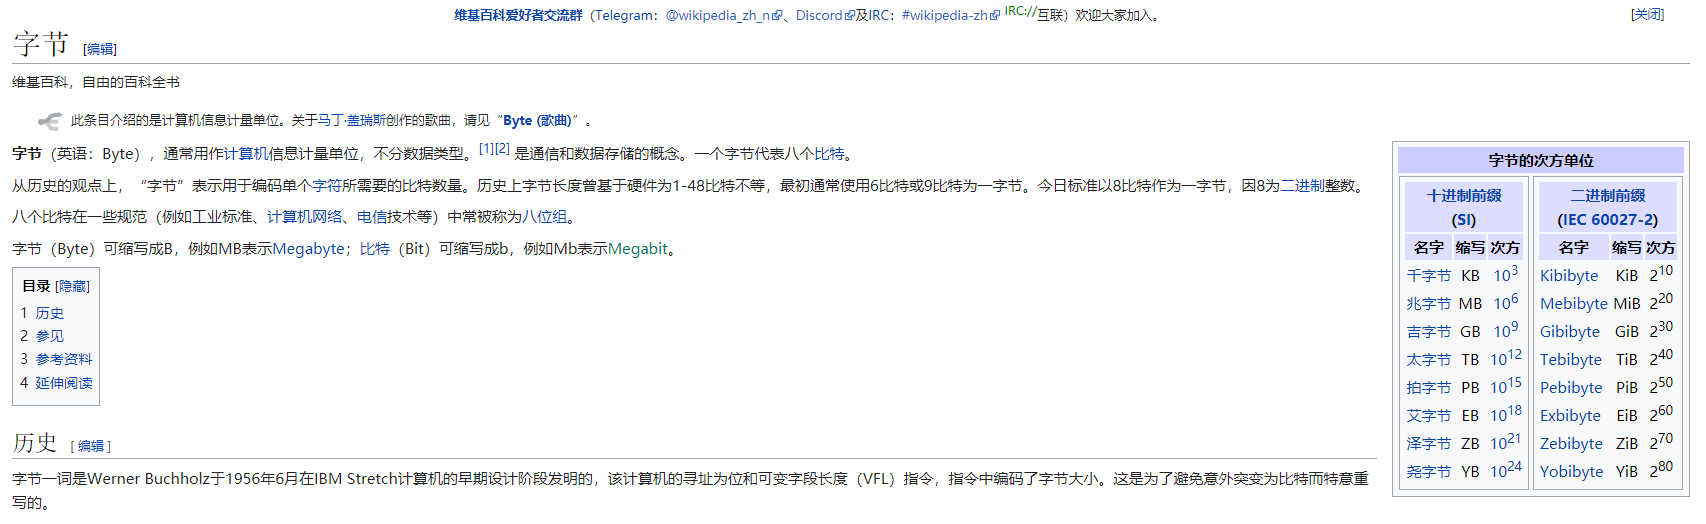

In [23]:
55000 * 784 * 4

172480000

In [24]:
55000 * 10 * 4

2200000

In [25]:
784*10*4

31360

In [26]:
10*4

40

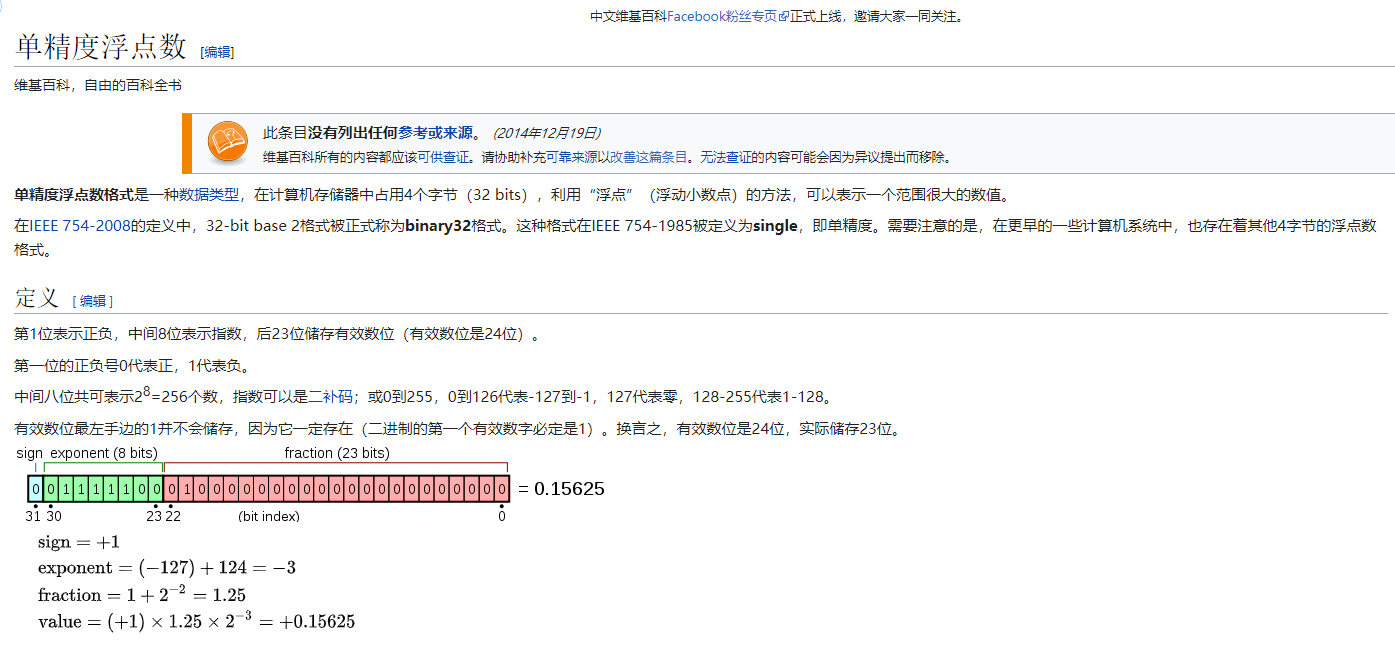

# TensorFlow Mini-batching

不幸的是，有时候不可能把数据完全分割成相同数量的 batch。例如有 1000 个数据点，你想每个 batch 有 128 个数据。但是 1000 无法被 128 整除。你得到的结果是其中 7 个 batch 有 128 个数据点，一个 batch 有 104 个数据点。(7*128 + 1*104 = 1000)

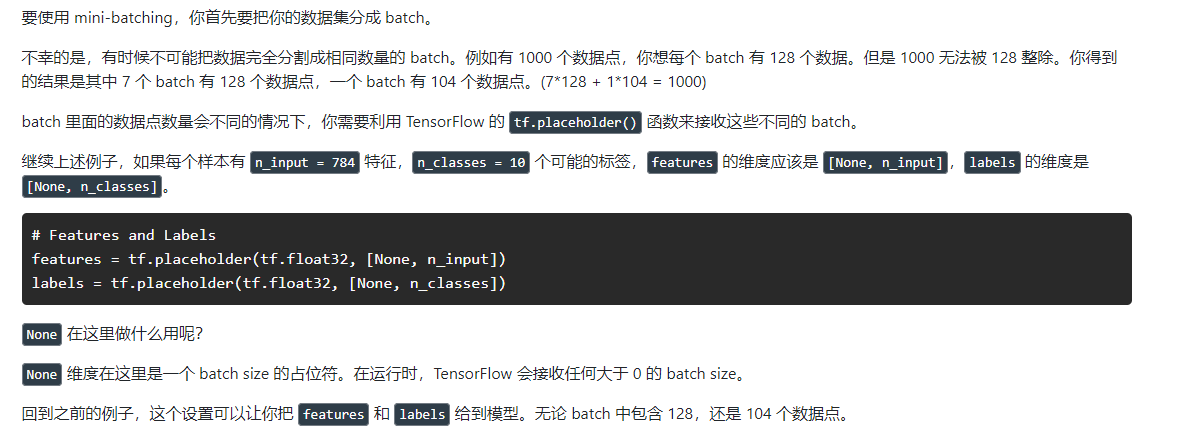

In [32]:
50000//128

390

In [33]:
50000%128

80

In [ ]:
[[[['F11', 'F12', 'F13', 'F14'],
   ['F21', 'F22', 'F23', 'F24'],
   ['F31', 'F32', 'F33', 'F34']],
  [['L11', 'L12'], ['L21', 'L22'], ['L31', 'L32']]],
 [[['F41', 'F42', 'F43', 'F44']], [['L41', 'L42']]]]

In [ ]:
sequences_to_matrix(
  tokenizer,
  sequences,
  mode = c("binary", "count", "tfidf", "freq")
)

https://faroit.com/keras-docs/2.0.0/preprocessing/text/

In [ ]:
keras.preprocessing.text.Tokenizer(num_words=None, filters=base_filter(), 
    lower=True, split=" ")

In [ ]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=2000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

### 只是根据train set中的词来吗？

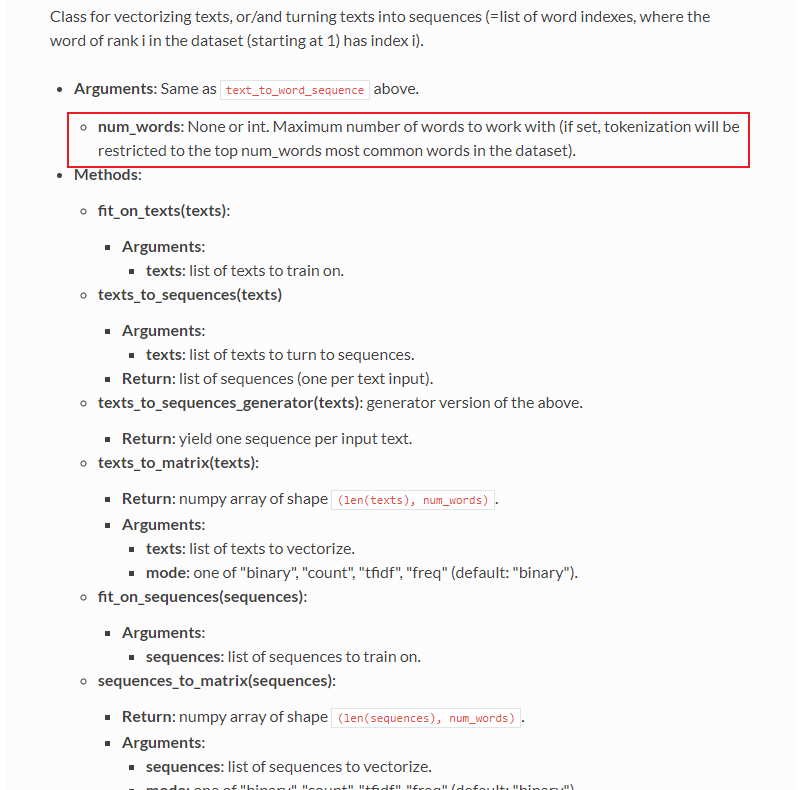

## Min-Max_Scaling

### 不知道哪样做会比较有效

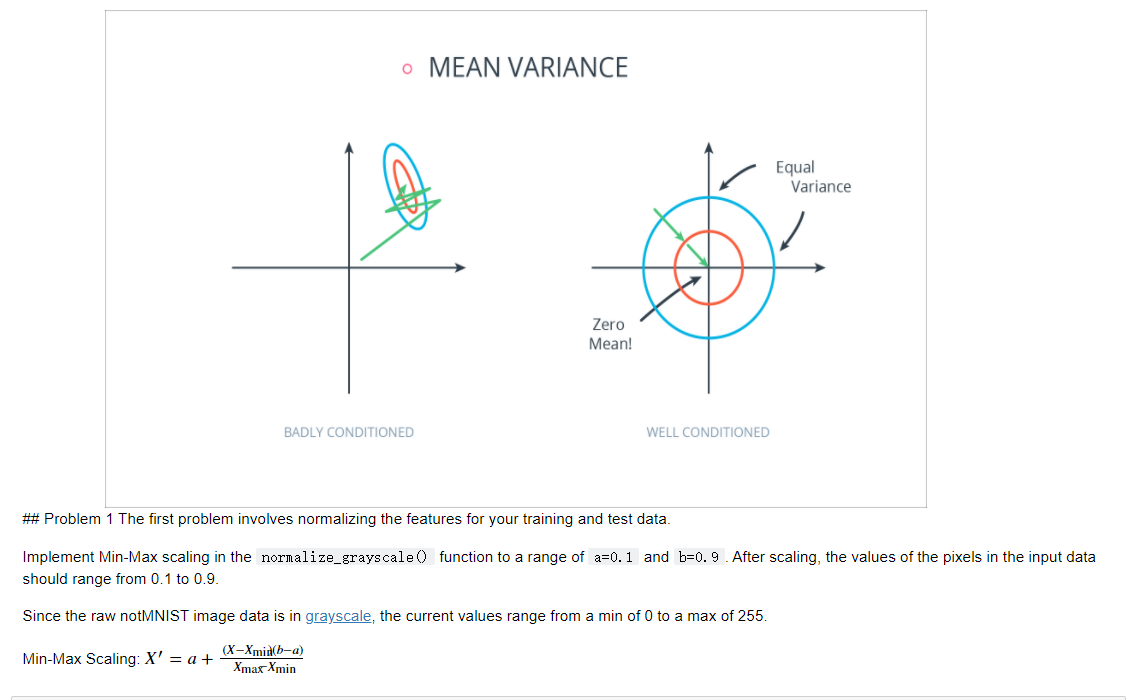

In [ ]:
"""
给出样例

永远根据train的来？


不一定会发生的情况


休息好


反应

"""

### 比较均匀的样本
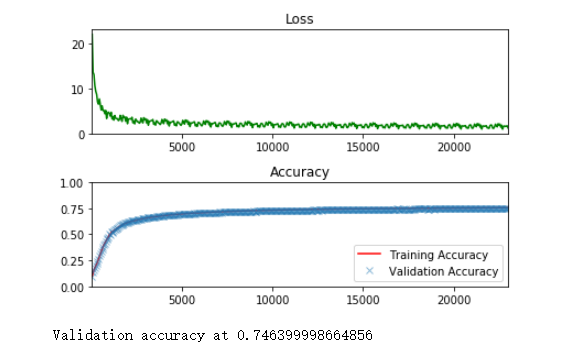

### 有持续反馈的

#### 查找函数和尝试的

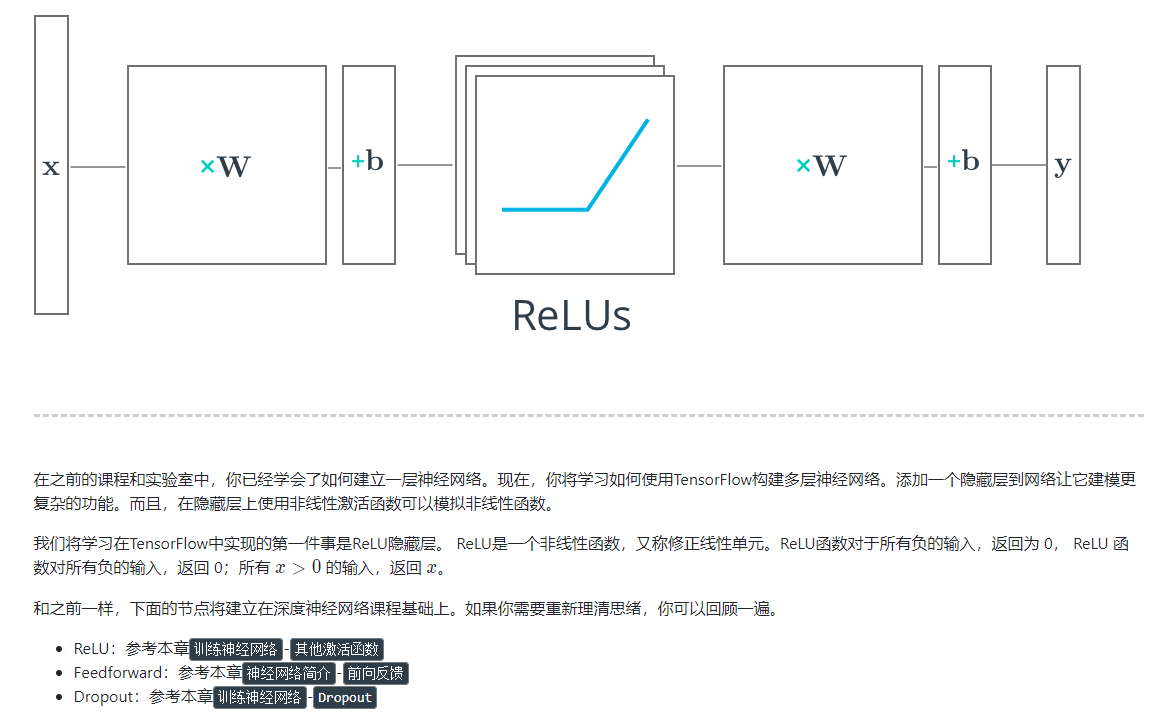

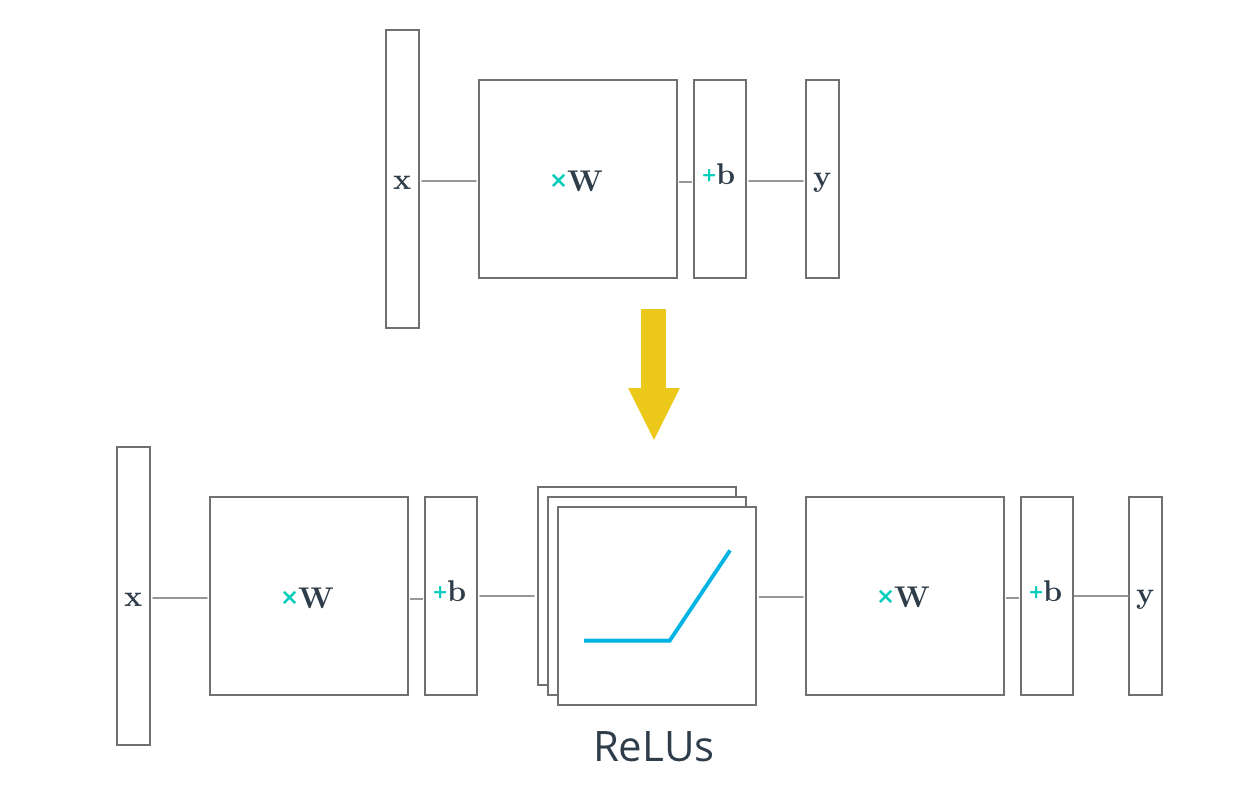

In [ ]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

output = None
hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[1.0, 2.0, 3.0, 4.0], [-1.0, -2.0, -3.0, -4.0], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model
hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)

output = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

output = tf.nn.softmax(output)

# TODO: Print session results
init = tf.global_variables_initializer()
with tf.Session() as session:
    # TODO: Initialize session variables
    session.run(init)
    output = session.run(output)

print(output)

# Make a model

In [ ]:
# Remove previous Tensors and Operations
# 移除之前的  Tensors 和运算
tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

learning_rate = 0.001
n_input = 784  # MNIST 数据输入 (图片尺寸: 28*28)
n_classes = 10  # MNIST 总计类别 (数字 0-9)

# Import MNIST data
# 加载 MNIST 数据
mnist = input_data.read_data_sets('.', one_hot=True)

# Features and Labels
# 特征和标签
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# Weights & bias
# 权重和偏置项
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# Logits - xW + b
logits = tf.add(tf.matmul(features, weights), bias)

# Define loss and optimizer
# 定义损失函数和优化器
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Calculate accuracy
# 计算准确率
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Train and save

In [ ]:
import math

save_file = './train_model.ckpt'
batch_size = 128
n_epochs = 100

saver = tf.train.Saver()

# Launch the graph
# 启动图
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Training cycle
    # 训练循环
    for epoch in range(n_epochs):
        total_batch = math.ceil(mnist.train.num_examples / batch_size)

        # Loop over all batches
        # 遍历所有 batch
        for i in range(total_batch):
            batch_features, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(
                optimizer,
                feed_dict={features: batch_features, labels: batch_labels})

        # Print status for every 10 epochs
        # 每运行10个 epoch 打印一次状态
        if epoch % 10 == 0:
            valid_accuracy = sess.run(
                accuracy,
                feed_dict={
                    features: mnist.validation.images,
                    labels: mnist.validation.labels})
            print('Epoch {:<3} - Validation Accuracy: {}'.format(
                epoch,
                valid_accuracy))

    # Save the model
    # 保存模型
    saver.save(sess, save_file)
    print('Trained Model Saved.')

# Load and predict

In [ ]:
saver = tf.train.Saver()

# Launch the graph
# 加载图
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: mnist.test.images, labels: mnist.test.labels})

print('Test Accuracy: {}'.format(test_accuracy))

# 参数微调

In [ ]:
import tensorflow as tf

# Remove the previous weights and bias
# 移除先前的权重和偏置项
tf.reset_default_graph()

save_file = 'model.ckpt'

# Two Tensor Variables: weights and bias
# 两个 Tensor 变量：权重和偏置项
weights = tf.Variable(tf.truncated_normal([2, 3]))
bias = tf.Variable(tf.truncated_normal([3]))

saver = tf.train.Saver()

# Print the name of Weights and Bias
# 打印权重和偏置项的名字
print('Save Weights: {}'.format(weights.name))
print('Save Bias: {}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, save_file)

# Remove the previous weights and bias
# 移除之前的权重和偏置项
tf.reset_default_graph()

# Two Variables: weights and bias
# 两个变量：权重和偏置项
bias = tf.Variable(tf.truncated_normal([3]))
weights = tf.Variable(tf.truncated_normal([2, 3]))

saver = tf.train.Saver()

# Print the name of Weights and Bias
# 打印权重和偏置项的名字
print('Load Weights: {}'.format(weights.name))
print('Load Bias: {}'.format(bias.name))

with tf.Session() as sess:
    # Load the weights and bias - ERROR
    # 加载权重和偏置项 - 报错
    saver.restore(sess, save_file)

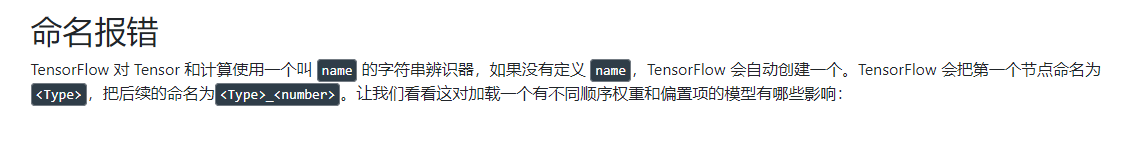

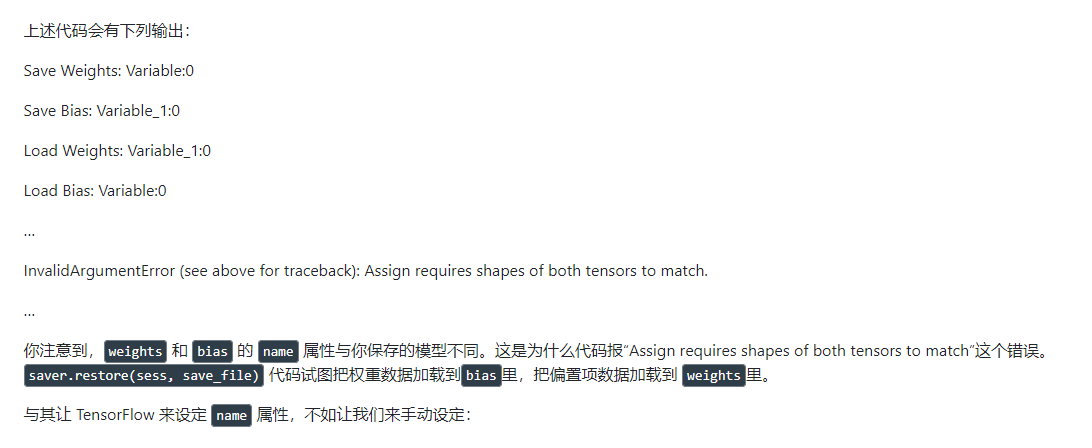

In [ ]:
import tensorflow as tf

tf.reset_default_graph()

save_file = 'model.ckpt'

# Two Tensor Variables: weights and bias
# 两个 Tensor 变量：权重和偏置项
weights = tf.Variable(tf.truncated_normal([2, 3]), name='weights_0')
bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')

saver = tf.train.Saver()

# Print the name of Weights and Bias
# 打印权重和偏置项的名称
print('Save Weights: {}'.format(weights.name))
print('Save Bias: {}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, save_file)

# Remove the previous weights and bias
# 移除之前的权重和偏置项
tf.reset_default_graph()

# Two Variables: weights and bias
# 两个变量：权重和偏置项
bias = tf.Variable(tf.truncated_normal([3]), name='bias_0')
weights = tf.Variable(tf.truncated_normal([2, 3]) ,name='weights_0')

saver = tf.train.Saver()

# Print the name of Weights and Bias
# 打印权重和偏置项的名称
print('Load Weights: {}'.format(weights.name))
print('Load Bias: {}'.format(bias.name))

with tf.Session() as sess:
    # Load the weights and bias - No Error
    # 加载权重和偏置项 - 没有报错
    saver.restore(sess, save_file)

print('Loaded Weights and Bias successfully.')

# Add dropout
https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

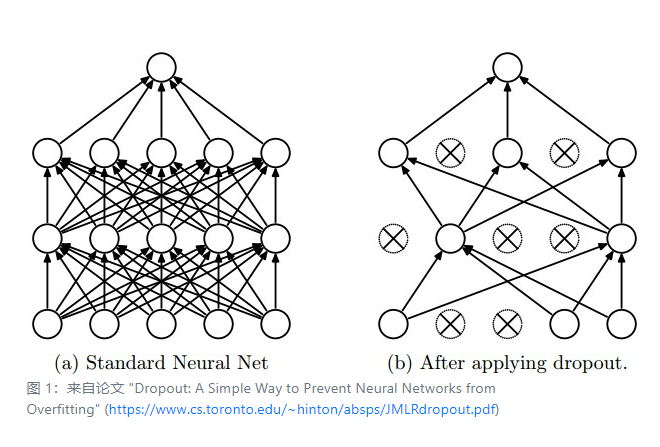

In [ ]:
keep_prob = tf.placeholder(tf.float32) # probability to keep units

hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

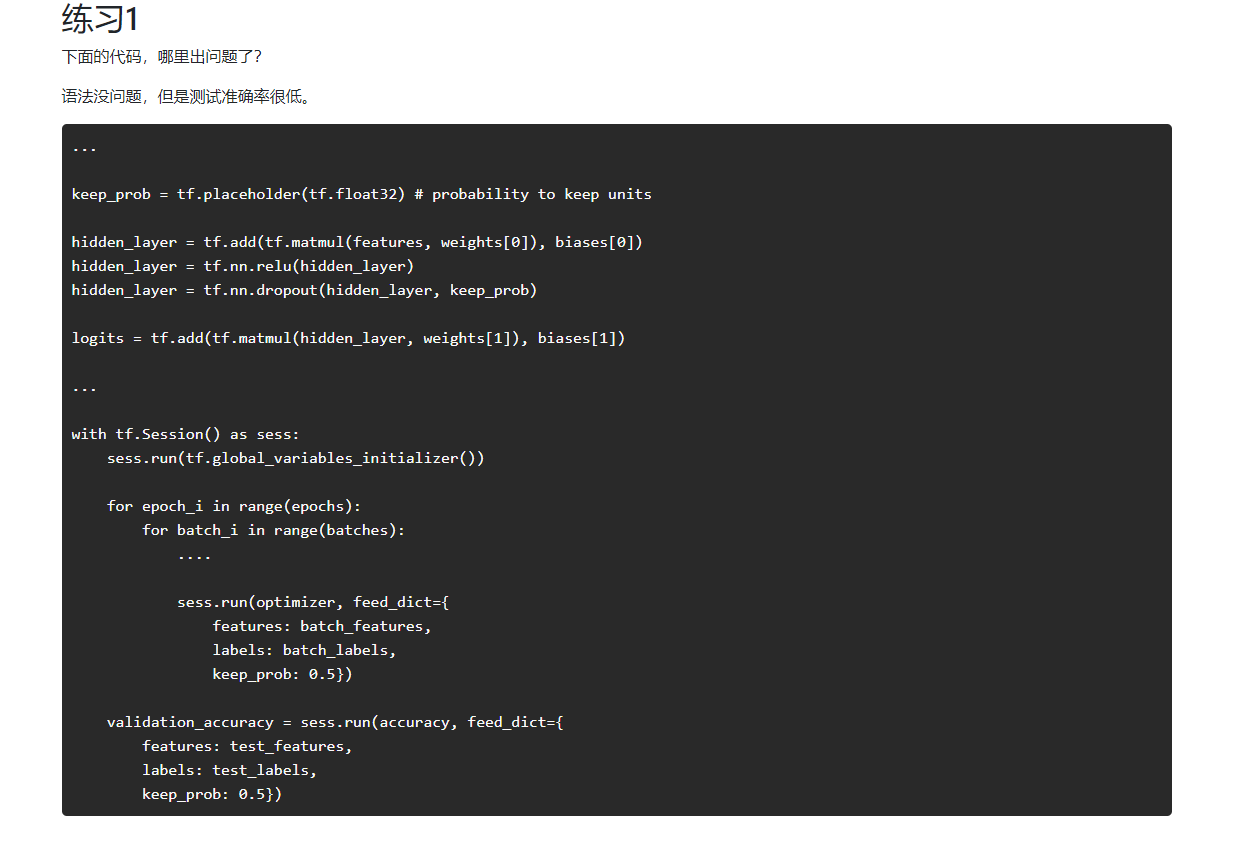

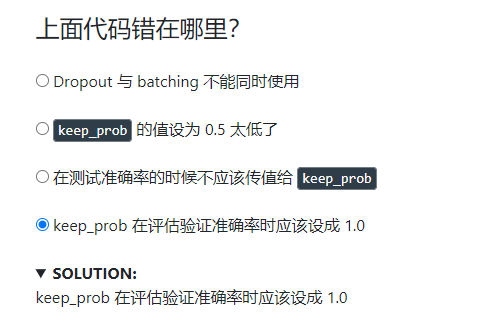

## Add dropout layer

In [ ]:
# Solution is available in the other "solution.py" tab
import tensorflow as tf

hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[0.0, 2.0, 3.0, 4.0], [0.1, 0.2, 0.3, 0.4], [11.0, 12.0, 13.0, 14.0]])


keep_prob = tf.placeholder(tf.float32) # probability to keep units

# TODO: Create Model with Dropout
# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(features, weights[0]), biases[0])
layer_1 = tf.nn.relu(layer_1)
layer_1 = tf.nn.dropout(layer_1, keep_prob)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights[1]) + biases[1]

# TODO: Print logits from a session
init = tf.global_variables_initializer()
with tf.Session() as session:
    # TODO: Initialize session variables
    session.run(init)
    output = session.run(logits, {keep_prob: 0.5})

print(output)
